In [25]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

%cd C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19

C:\Users\rachel.seeley\Documents\GitHub\dfms-covid19


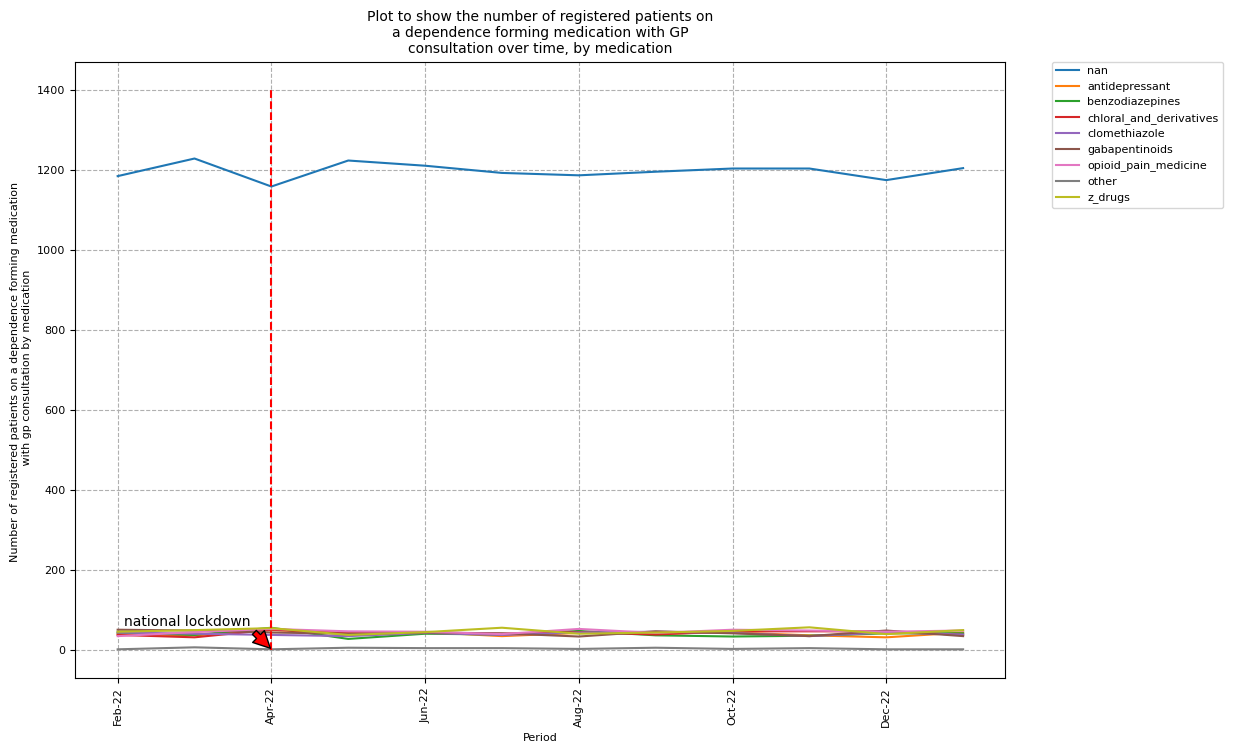

In [26]:
data_measure_gp_consultation_with_medication_rate = pd.read_csv("output/measure_gp_consultation_with_medication_rate.csv", parse_dates=["date"])
data_measure_gp_consultation_with_medication_rate = data_measure_gp_consultation_with_medication_rate.loc[data_measure_gp_consultation_with_medication_rate["with_consultation"] == 1, :]
df_measure_gp_consultation_with_medication_rate = pd.DataFrame.pivot(data_measure_gp_consultation_with_medication_rate, index='date', columns='medication', values='research_population')
df_measure_gp_consultation_with_medication_rate.index = pd.to_datetime(df_measure_gp_consultation_with_medication_rate.index).strftime('%b-%y')
ax = df_measure_gp_consultation_with_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with gp consultation by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=1400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig("output/measure_gp_consultation_with_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [27]:
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1184                39                 43                         37               43                50                      34        1         45
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1204                43                 41                         37               38                34                      48        1         49


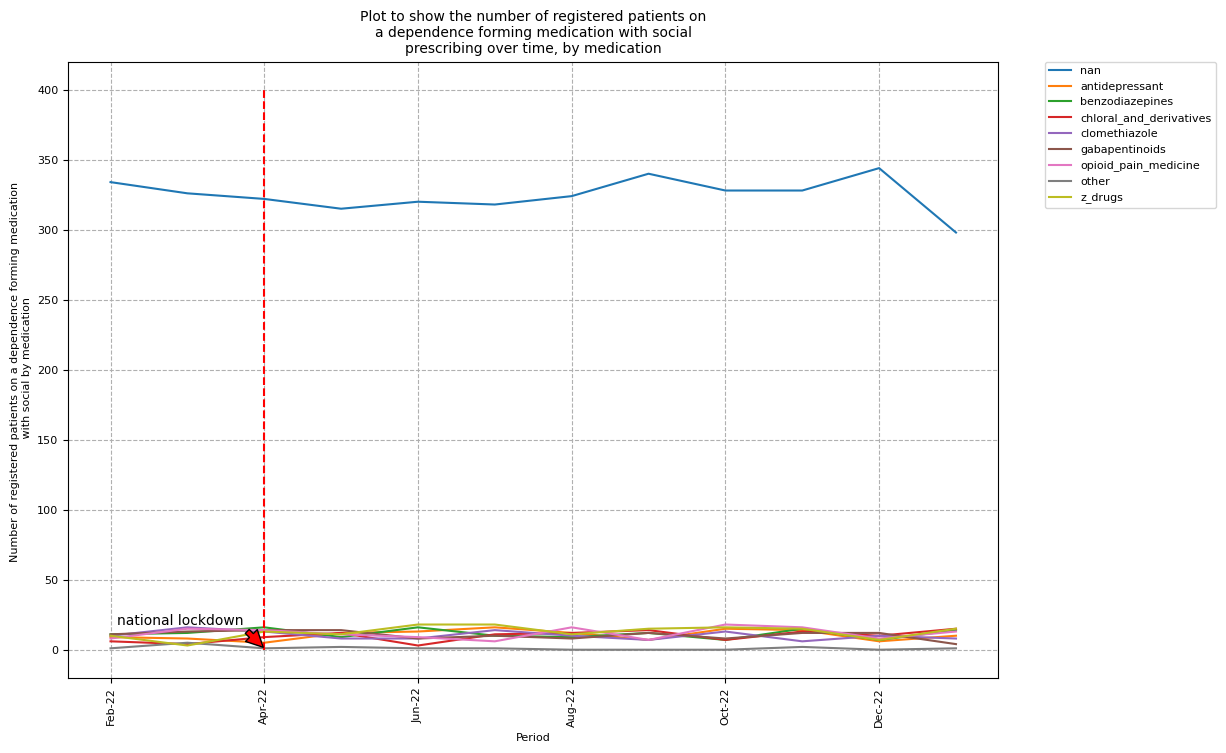

In [28]:
data_measure_social_prescribing_with_medication_rate = pd.read_csv("output/measure_social_prescribing_with_medication_rate.csv", parse_dates=["date"])
data_measure_social_prescribing_with_medication_rate = data_measure_social_prescribing_with_medication_rate.loc[data_measure_social_prescribing_with_medication_rate["with_social_prescribing"] == 1, :]
df_measure_social_prescribing_with_medication_rate = pd.DataFrame.pivot(data_measure_social_prescribing_with_medication_rate, index='date', columns='medication', values='research_population')
df_measure_social_prescribing_with_medication_rate.index = pd.to_datetime(df_measure_social_prescribing_with_medication_rate.index).strftime('%b-%y')
ax = df_measure_social_prescribing_with_medication_rate.plot(fontsize=8, figsize=(12,8))
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \n with social by medication', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Plot to show the number of registered patients on a dependence forming medication with social prescribing over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig("output/measure_social_prescribing_with_medication_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [29]:
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_gp_consultation_with_medication_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Feb-22   1184                39                 43                         37               43                50                      34        1         45
date      nan    antidepressant    benzodiazepines    chloral_and_derivatives    clomethiazole    gabapentinoids    opioid_pain_medicine    other    z_drugs
------  -----  ----------------  -----------------  -------------------------  ---------------  ----------------  ----------------------  -------  ---------
Jan-23   1204                43                 41                         37               38                34                      48        1         49


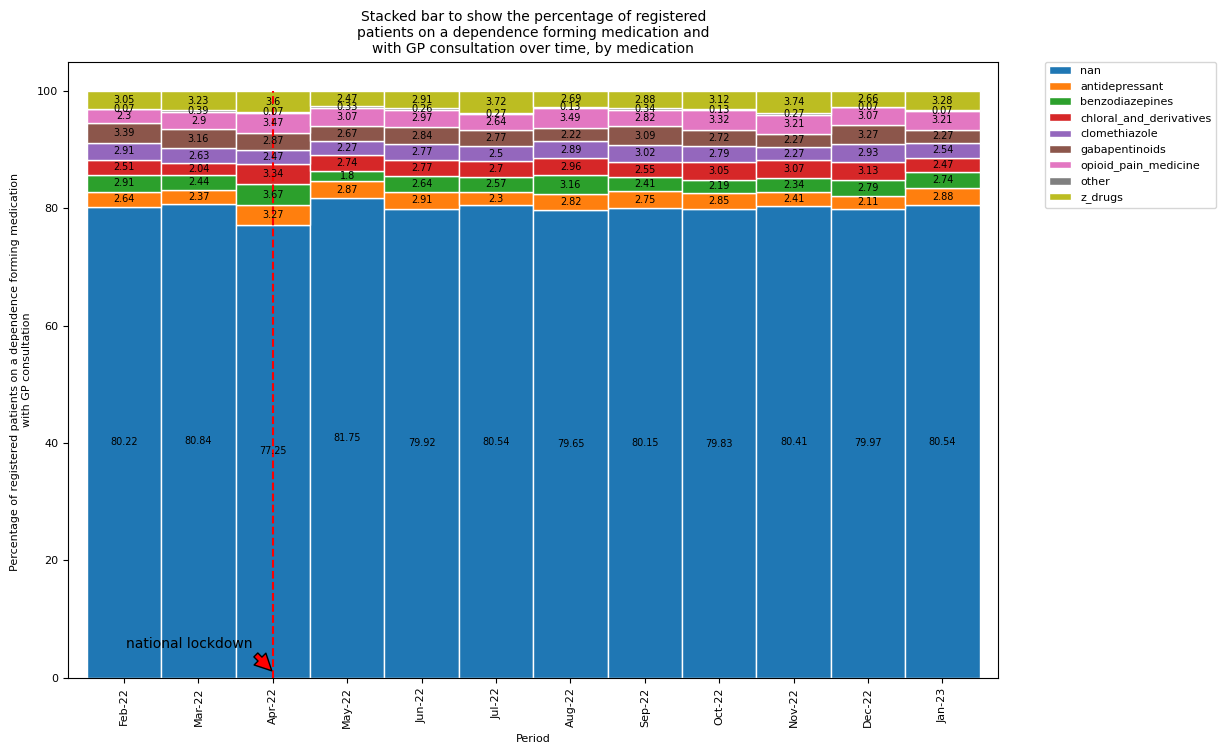

In [34]:
df_consult_stacked = pd.DataFrame(df_measure_gp_consultation_with_medication_rate)
df_consult_stacked.head()
tot = df_consult_stacked.sum(axis=1)
per = df_consult_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig("output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

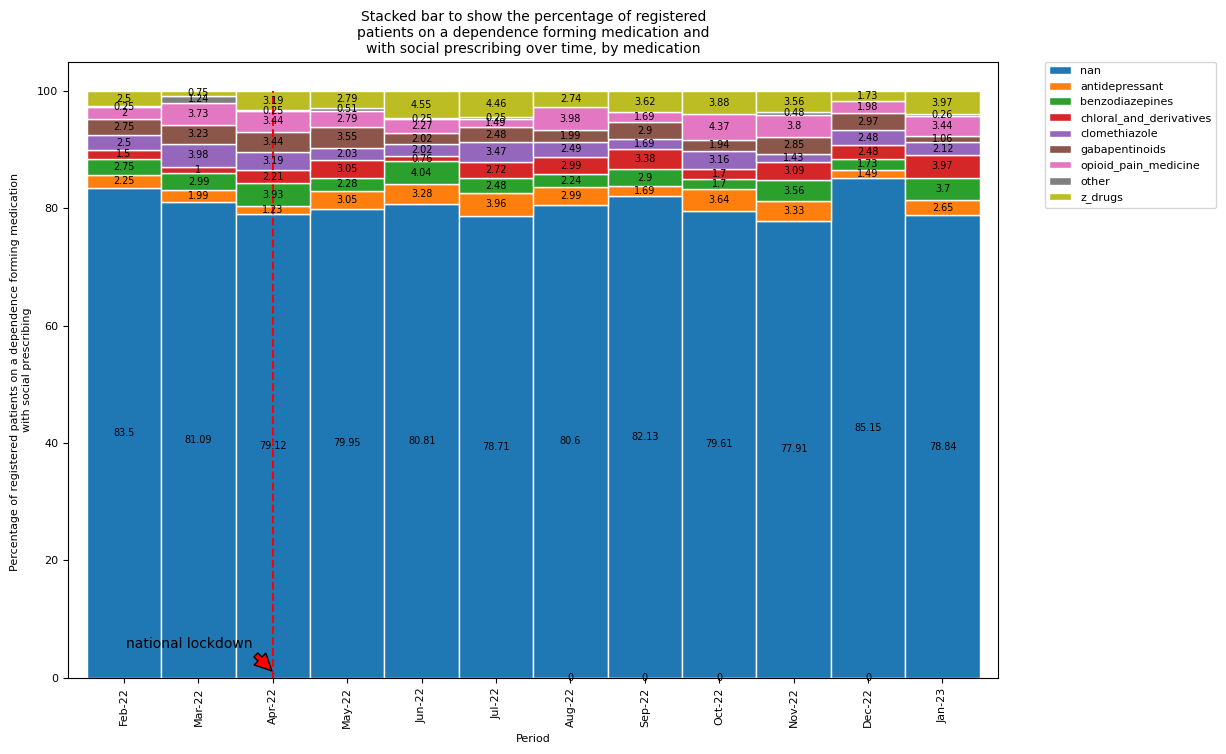

In [36]:
df_socialrx_stacked = pd.DataFrame(df_measure_social_prescribing_with_medication_rate)
df_socialrx_stacked.head()
tot = df_socialrx_stacked.sum(axis=1)
per = df_socialrx_stacked.div(tot, axis=0).mul(100).round(2)
ax = per.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith social prescribing', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=7)
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with social prescribing over time, by medication'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig("output/measure_dfm_medications_grouped_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()